In [1]:
import numpy as np
import pandas as pd
import pygmo
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
 
    
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib 
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

from config import MAX_DISCOUNT, FEATURES

%matplotlib inline

C:\Users\jiahang.zhong\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('training_data_randn.csv')
cols_x = FEATURES
col_y = 'is_deal'
col_p = 'Probability'
print(df.shape)

(1000000, 22)


In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
x_c0,0.378147,0.547435,0.443607,0.653491,0.513386,0.424229,0.445130,0.398404,0.663755,0.470848
x_c1,0.433505,0.638517,0.457838,0.686376,0.435056,0.379069,0.646733,0.451692,0.378234,0.325450
nPurchases,1.000000,1.000000,2.000000,9.000000,19.000000,5.000000,4.000000,17.000000,0.000000,0.000000
AvgPrice,1880.000000,1430.000000,1940.000000,2160.000000,1270.000000,2110.000000,1210.000000,1580.000000,1630.000000,2620.000000
AvgService,430.000000,240.000000,920.000000,1310.000000,370.000000,240.000000,510.000000,890.000000,760.000000,1180.000000
nPurchasesDiscount,0.000000,1.000000,2.000000,3.000000,3.000000,5.000000,1.000000,5.000000,0.000000,0.000000
AvgDiscount,527.000000,275.000000,353.000000,402.000000,289.000000,347.000000,246.000000,315.000000,280.000000,408.000000
CLV,7400.000000,5100.000000,12500.000000,14900.000000,10700.000000,10400.000000,6000.000000,12200.000000,8300.000000,11800.000000
customer_id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
product_id,4.000000,1.000000,3.000000,0.000000,4.000000,4.000000,4.000000,2.000000,3.000000,0.000000


In [4]:
df.describe()

,x_c0,x_c1,nPurchases,AvgPrice,AvgService,nPurchasesDiscount,AvgDiscount,CLV,customer_id,product_id,...,Service,Cost,BaseProb,D_Scale_exp,D_Scale_act,D_Freq,DiscountEffect,Probability,Discount,is_deal
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,0.500164,0.500089,5.975117,1778.012160,622.079080,2.986556,355.450543,9399.724900,499999.500000,2.000578,...,549.723260,638.224970,0.406038,0.171596,0.173335,0.415603,8.045924e-01,0.559645,339.660080,0.560222
std,0.099952,0.099926,6.823650,559.776399,425.079767,4.313627,134.410251,4018.894607,288675.278933,1.414573,...,356.364778,331.710306,0.141582,0.037804,0.101205,0.231961,8.942717e-01,0.222326,235.441192,0.496360
min,0.019072,0.041169,0.000000,810.000000,0.000000,0.000000,-36.000000,2000.000000,0.000000,0.000000,...,180.000000,280.000000,0.001808,-0.016834,0.000000,0.012000,4.202521e-15,0.003040,0.000000,0.000000
25%,0.432725,0.432710,0.000000,1290.000000,280.000000,0.000000,247.000000,6300.000000,249999.750000,1.000000,...,210.000000,410.000000,0.330462,0.145477,0.086633,0.300000,1.108857e-01,0.411513,150.000000,0.000000
50%,0.500192,0.500069,3.000000,1780.000000,550.000000,1.000000,342.000000,8800.000000,499999.500000,2.000000,...,410.000000,430.000000,0.420197,0.170364,0.172148,0.300000,4.882813e-01,0.544919,300.000000,1.000000
75%,0.567540,0.567491,10.000000,2260.000000,900.000000,4.000000,449.000000,11700.000000,749999.250000,3.000000,...,950.000000,960.000000,0.501861,0.196354,0.258419,0.627778,1.232691e+00,0.726039,490.000000,1.000000
max,0.956460,0.954523,24.000000,2750.000000,1920.000000,24.000000,991.000000,33800.000000,999999.000000,4.000000,...,1000.000000,1110.000000,0.929003,0.368509,0.395557,0.972000,5.292261e+00,0.999824,1000.000000,1.000000


In [5]:
n_train = int(0.8*len(df))
x_raw = df[cols_x]
x_raw_train = x_raw[:n_train]
x_raw_test  = x_raw[n_train:]
y_train = df[col_y][:n_train]
y_test = df[col_y][n_train:]
p_train = df[col_p][:n_train]
p_test = df[col_p][n_train:]
scaler = StandardScaler()
scaler.fit(x_raw_train)
x_trf_train = scaler.transform(x_raw_train)
x_trf_test = scaler.transform(x_raw_test)

joblib.dump(scaler, 'x_scalar_randn.pkl') 


['x_scalar_randn.pkl']

In [6]:
l_x = Input(shape=(len(cols_x),))
l_h1 = Dense(12, activation='relu')(l_x)
l_h2 = Dense(4, activation='tanh')(l_h1)
l_y = Dense(1, activation='sigmoid')(l_h2)
model = Model(inputs=l_x, outputs=l_y)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_trf_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

# acc=0.683 for randn x_i


Train on 640000 samples, validate on 160000 samples
Epoch 1/10
640000/640000 [==============================] - 6s 9us/step - loss: 0.5976 - acc: 0.6683 - val_loss: 0.5846 - val_acc: 0.6769
Epoch 2/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5837 - acc: 0.6766 - val_loss: 0.5803 - val_acc: 0.6792
Epoch 3/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5810 - acc: 0.6780 - val_loss: 0.5791 - val_acc: 0.6803
Epoch 4/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5796 - acc: 0.6789 - val_loss: 0.5776 - val_acc: 0.6821
Epoch 5/10
640000/640000 [==============================] - 5s 9us/step - loss: 0.5789 - acc: 0.6796 - val_loss: 0.5770 - val_acc: 0.6828
Epoch 6/10
640000/640000 [==============================] - 6s 9us/step - loss: 0.5784 - acc: 0.6795 - val_loss: 0.5769 - val_acc: 0.6824
Epoch 7/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5780 - acc: 0.6802 - val_loss: 0.5764 

In [7]:
model.save('propensity_model_randn.h5')

In [8]:
y_pred_train = model.predict(x_trf_train)
y_pred_test = model.predict(x_trf_test)

In [9]:
# rand x_i: 0.764
# randn x_i: 0.784
# unity x_i: 0.85
roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_test)

(0.7521415732508905, 0.753590915332144)

In [10]:
print(np.sqrt(mean_squared_error(p_train, y_pred_train)), mean_absolute_error(p_train, y_pred_train),r2_score(p_train, y_pred_train) )
print(np.sqrt(mean_squared_error(p_test, y_pred_test)), mean_absolute_error(p_test, y_pred_test),r2_score(p_test, y_pred_test) )

0.04197176454050576 0.031193836537991248 0.9643505998304627
0.04200418930604375 0.031245089516962383 0.9643437673814681


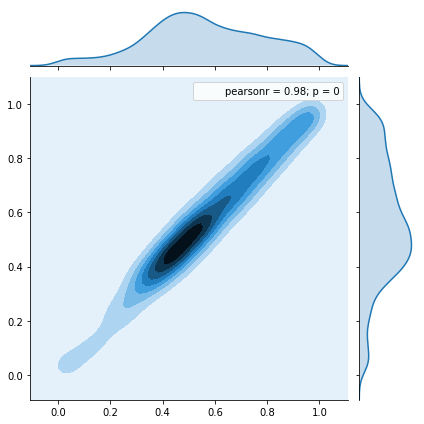

In [11]:
sns.jointplot(x=p_test.values[:10000], y=y_pred_test[:10000, 0], kind="kde")